In [17]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/microsoft/ML-For-Beginners/refs/heads/main/2-Regression/data/US-pumpkins.csv")
data.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [8]:
# checking a sample of the dataset
data.sample(6)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
901,COLUMBIA,NaN,24 inch bins,HOWDEN WHITE TYPE,NaN,NaN,9/2/17,200.0,200.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
498,BOSTON,NaN,24 inch bins,KNUCKLE HEAD,NaN,NaN,9/24/16,260.0,285.0,285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
1730,ST. LOUIS,NaN,1/2 bushel cartons,MINIATURE,FLAT TYPE,NaN,9/28/16,12.5,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,ABOUT STEADY.
747,CHICAGO,NaN,36 inch bins,PIE TYPE,NaN,NaN,9/30/17,200.0,200.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
1666,ST. LOUIS,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/26/16,125.0,135.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,LOWER.
227,BOSTON,NaN,36 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,140.0,160.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [5]:
# checking the shape
data.shape

(1757, 26)

In [6]:
# checking columns
data.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [7]:
# checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [9]:
# checking summary stats
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Grade,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low Price,1757.0,124.571338,83.876591,0.24,24.000,140.0,180.0,480.0
High Price,1757.0,132.970939,89.524958,0.24,24.500,150.0,200.0,480.0
Mostly Low,1654.0,128.170550,86.512161,0.24,24.625,147.0,185.0,480.0
Mostly High,1654.0,132.491802,88.442967,0.24,26.125,150.0,200.0,480.0
Environment,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quality,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appearance,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Storage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# describing categorical features
data.describe(include="O")

,City Name,Type,Package,Variety,Sub Variety,Date,Origin,Origin District,Item Size,Color,Unit of Sale,Repack,Unnamed: 25
count,1757,45,1757,1752,296,1757,1754,131,1478,1141,162,1757,103
unique,13,1,15,10,2,57,24,5,7,3,4,2,4
top,BOSTON,Organic,36 inch bins,HOWDEN TYPE,FLAT TYPE,10/8/16,PENNSYLVANIA,QUEBEC,sml,ORANGE,PER BIN,N,LOWER.
freq,352,45,663,542,212,180,250,48,363,916,98,1752,41


In [11]:
# creating a copy before cleaning
df = data.copy(deep=True)
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [12]:
# checking for missing values
df.isnull().sum()


,0
City Name,0
Type,1712
Package,0
Variety,5
Sub Variety,1461
Grade,1757
Date,0
Low Price,0
High Price,0
Mostly Low,103


In [14]:
# selecting the columns that I need
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = df.loc[:, columns_to_select]
pumpkins.head()

,Package,Low Price,High Price,Date
0,24 inch bins,270.0,280.0,4/29/17
1,24 inch bins,270.0,280.0,5/6/17
2,24 inch bins,160.0,160.0,9/24/16
3,24 inch bins,160.0,160.0,9/24/16
4,24 inch bins,90.0,100.0,11/5/16


In [18]:
# correcting the date format
pumpkins['Date'] = pd.to_datetime(pumpkins['Date'])
pumpkins.head()

,Package,Low Price,High Price,Date
0,24 inch bins,270.0,280.0,2017-04-29
1,24 inch bins,270.0,280.0,2017-05-06
2,24 inch bins,160.0,160.0,2016-09-24
3,24 inch bins,160.0,160.0,2016-09-24
4,24 inch bins,90.0,100.0,2016-11-05


In [19]:
# determine the average price of pumpkin
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month


In [20]:
# creating a clean copy of the dataset
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


In [21]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

In [22]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

Text(0, 0.5, 'Pumpkin Price')

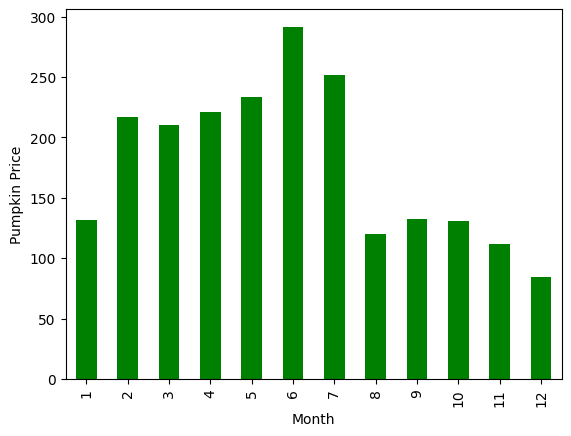

In [24]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar', color='g')
plt.ylabel("Pumpkin Price")

Text(0, 0.5, 'Price')

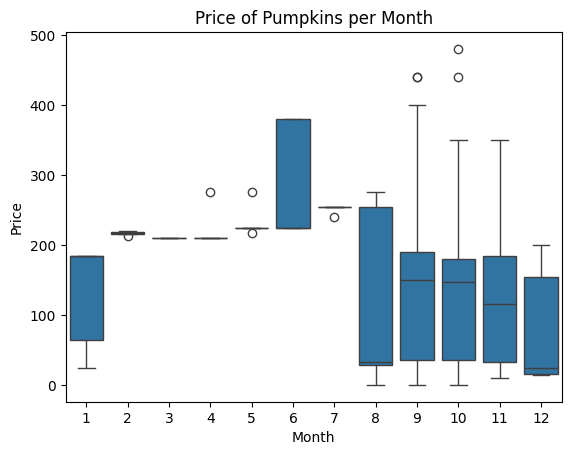

In [25]:
sns.boxplot(x='Month', y="Price", data=new_pumpkins)
plt.title("Price of Pumpkins per Month")
plt.xlabel("Month")
plt.ylabel("Price")